# 개요

- 카드 회사들은 고객 유치를 위해 많은 프로모션을 진행한다. 연회비를 삭감해주거나, 스타벅스 쿠폰을 주거나 많은 혜택을 제공하여 고객을 유치하지만, 고객을 **유지**하는 것은 **유치**하는 것보다 훨씬 더 힘이 든다. 때문에 이탈할 확률이 높은 고객을 사전에 예측하여 이탈을 막는 것은 카드사에게 굉장히 중요한 과제이다. 이번 팀 프로젝트에서는 10000여명의 고객 정보 데이터를 가지고 이탈 여부를 예측하는 **이탈 고객 예측** 모델을 만들어 본다.

## 과제 진행 방향 

- 이 데이터를 가지고 2가지 과제를 풀어 나갈 계획인데 
    1. 첫번째는 잔류(Existing)냐, 탈퇴(Attrited)냐를 예측하는 예측 모델을 만들어 볼 것이다. 타겟데이터가 주어진 **지도학습**중에서도 분류분석에 해당한다.
    2. 두번째는 타겟 칼럼을 지우고 고객 정보를 가지고 군집화를 진행할 것이다.

**필요한 모듈 임포트**

In [38]:
import pandas as pd # 데이터 핸들링 
import numpy as np 
import matplotlib.pyplot as plt # 데이터 시각화 
%matplotlib inline
import seaborn as sns # 데이터 시각화(고급분석)

**데이터 불러오기**
    - 데이터의 통일성을 위해서 데이터명은 df로, 경로는 "./data/BankChurners.csv"로 통일하였다.

In [39]:
df = pd.read_csv("./data/BankChurners.csv")
df = df.iloc[:,:-2]

### 데이터 정보
- 'CLIENTNUM' : 고객 식별 번호
- 'Attrition_Flag' : 신용 카드 이탈 여부
    - Existing Customer : 잔류
    - Attrited Customer : 이탈
- 'Customer_Age' : 고객 나이
- 'Gender' : 성별
- 'Dependent_count' : 부양 가족 수
- 'Education_Level' : 학력 수준
- 'Marital_Status' : 결혼 여부
- 'Income_Category' : 연 소득 구간
- 'Card_Category' : 카드 등급
- 'Months_on_book' : 카드 할부 기간
- 'Total_Relationship_Count' : 가입 상품 수
- 'Months_Inactive_12_mon' : 1년 동안 카드 결재 내역이 없는 비활성 기간(개월)
- 'Contacts_Count_12_mon' : 연락 빈도
- 'Credit_Limit' : 신용 한도
- 'Total_Revolving_Bal' : 할부 잔액
- 'Avg_Open_To_Buy' : 평균 실 사용 가능 금액 :  'Credit_Limit' -  'Total_Revolving_Bal'
- 'Total_Amt_Chng_Q4_Q1' : 결제 대금 기준 1분기 대비 4분기 (비율) 
- 'Total_Trans_Amt' : 실제 사용 총액
- 'Total_Trans_Ct' : 실제 사용 횟수
- 'Total_Ct_Chng_Q4_Q1' : 1분기 대비 4분기 결제 대금 횟수 비율
- 'Avg_Utilization_Ratio' : 'Total_Revolving_Bal'/ 'Credit_Limit' (할부 비율)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [41]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [42]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [43]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

### 전처리를 하는데 제일 많이 헷갈려 하는 부분 중 하나가 데이터의 타입이다. 지금 모든 피처변수(독립변수)가 숫자로 되어있지만, 이 안을 잘 구분해서 보면 범주형 변수랑 수치형 변수로 나누어져있다.

1. 첫번째로 "CLIENTNUM"는 고객번호인데, 이것은 아무의미도 없는 숫자이다. 고객을 식별하기 위해 부여한 아이디(식별자)일뿐다. (후에 삭제할 예정)

2. "Attrition_Flag", "Gender", "Marital_Status"는 범주화 되어 있고 이 칼럼들은 나중에 인코딩을 하게되는데,
     "Attrition_Flag"은 0,1 "Gender"은 0,1 "Marital_Status"은 0,1,2... 이런식으로 인코딩을 하게 될것이다. 하지만 이 인코딩 된 숫자들(0,1,2...)들은 사실상 범주를 뜻할 뿐이지 그 수 자체에 아무런 의미는 없다. (**명목척도**)
  
3. "Education_Level","Income_Category","Card_Category" 등도 범주화 된 변수들이지만, 이 변수들은 인코딩을 할 때 순서가 있게 된다. 예를 들면 카드는 blue-silver-gold-platinum 으로 카드 간의 등급을 매길 수가 있는데 이 순서대로 blue(0)-silver(1)-gold(2)-platinum(3) 인 코딩을 하게 되면 0,1,2,3으로 변수들간의 순서(서열)을 매길 수 있게 된다. (**서열척도**)

3. 그리고 나머지 모든 변수들 'Customer_Age','Dependent_count'... 등은 데이터들이 하나의 **수치**를 가지게 된다. (**수치형변수**)
     

**시각화** 데이터셋에 있는 모든 칼럼들을 간단하게 시각화 해놓은 것이다. 대각선방향으로는 히스토그램이 그려져있고, 나머지는 산점도가 그려져 있어서 한눈에 확인을 하기가 좋다.

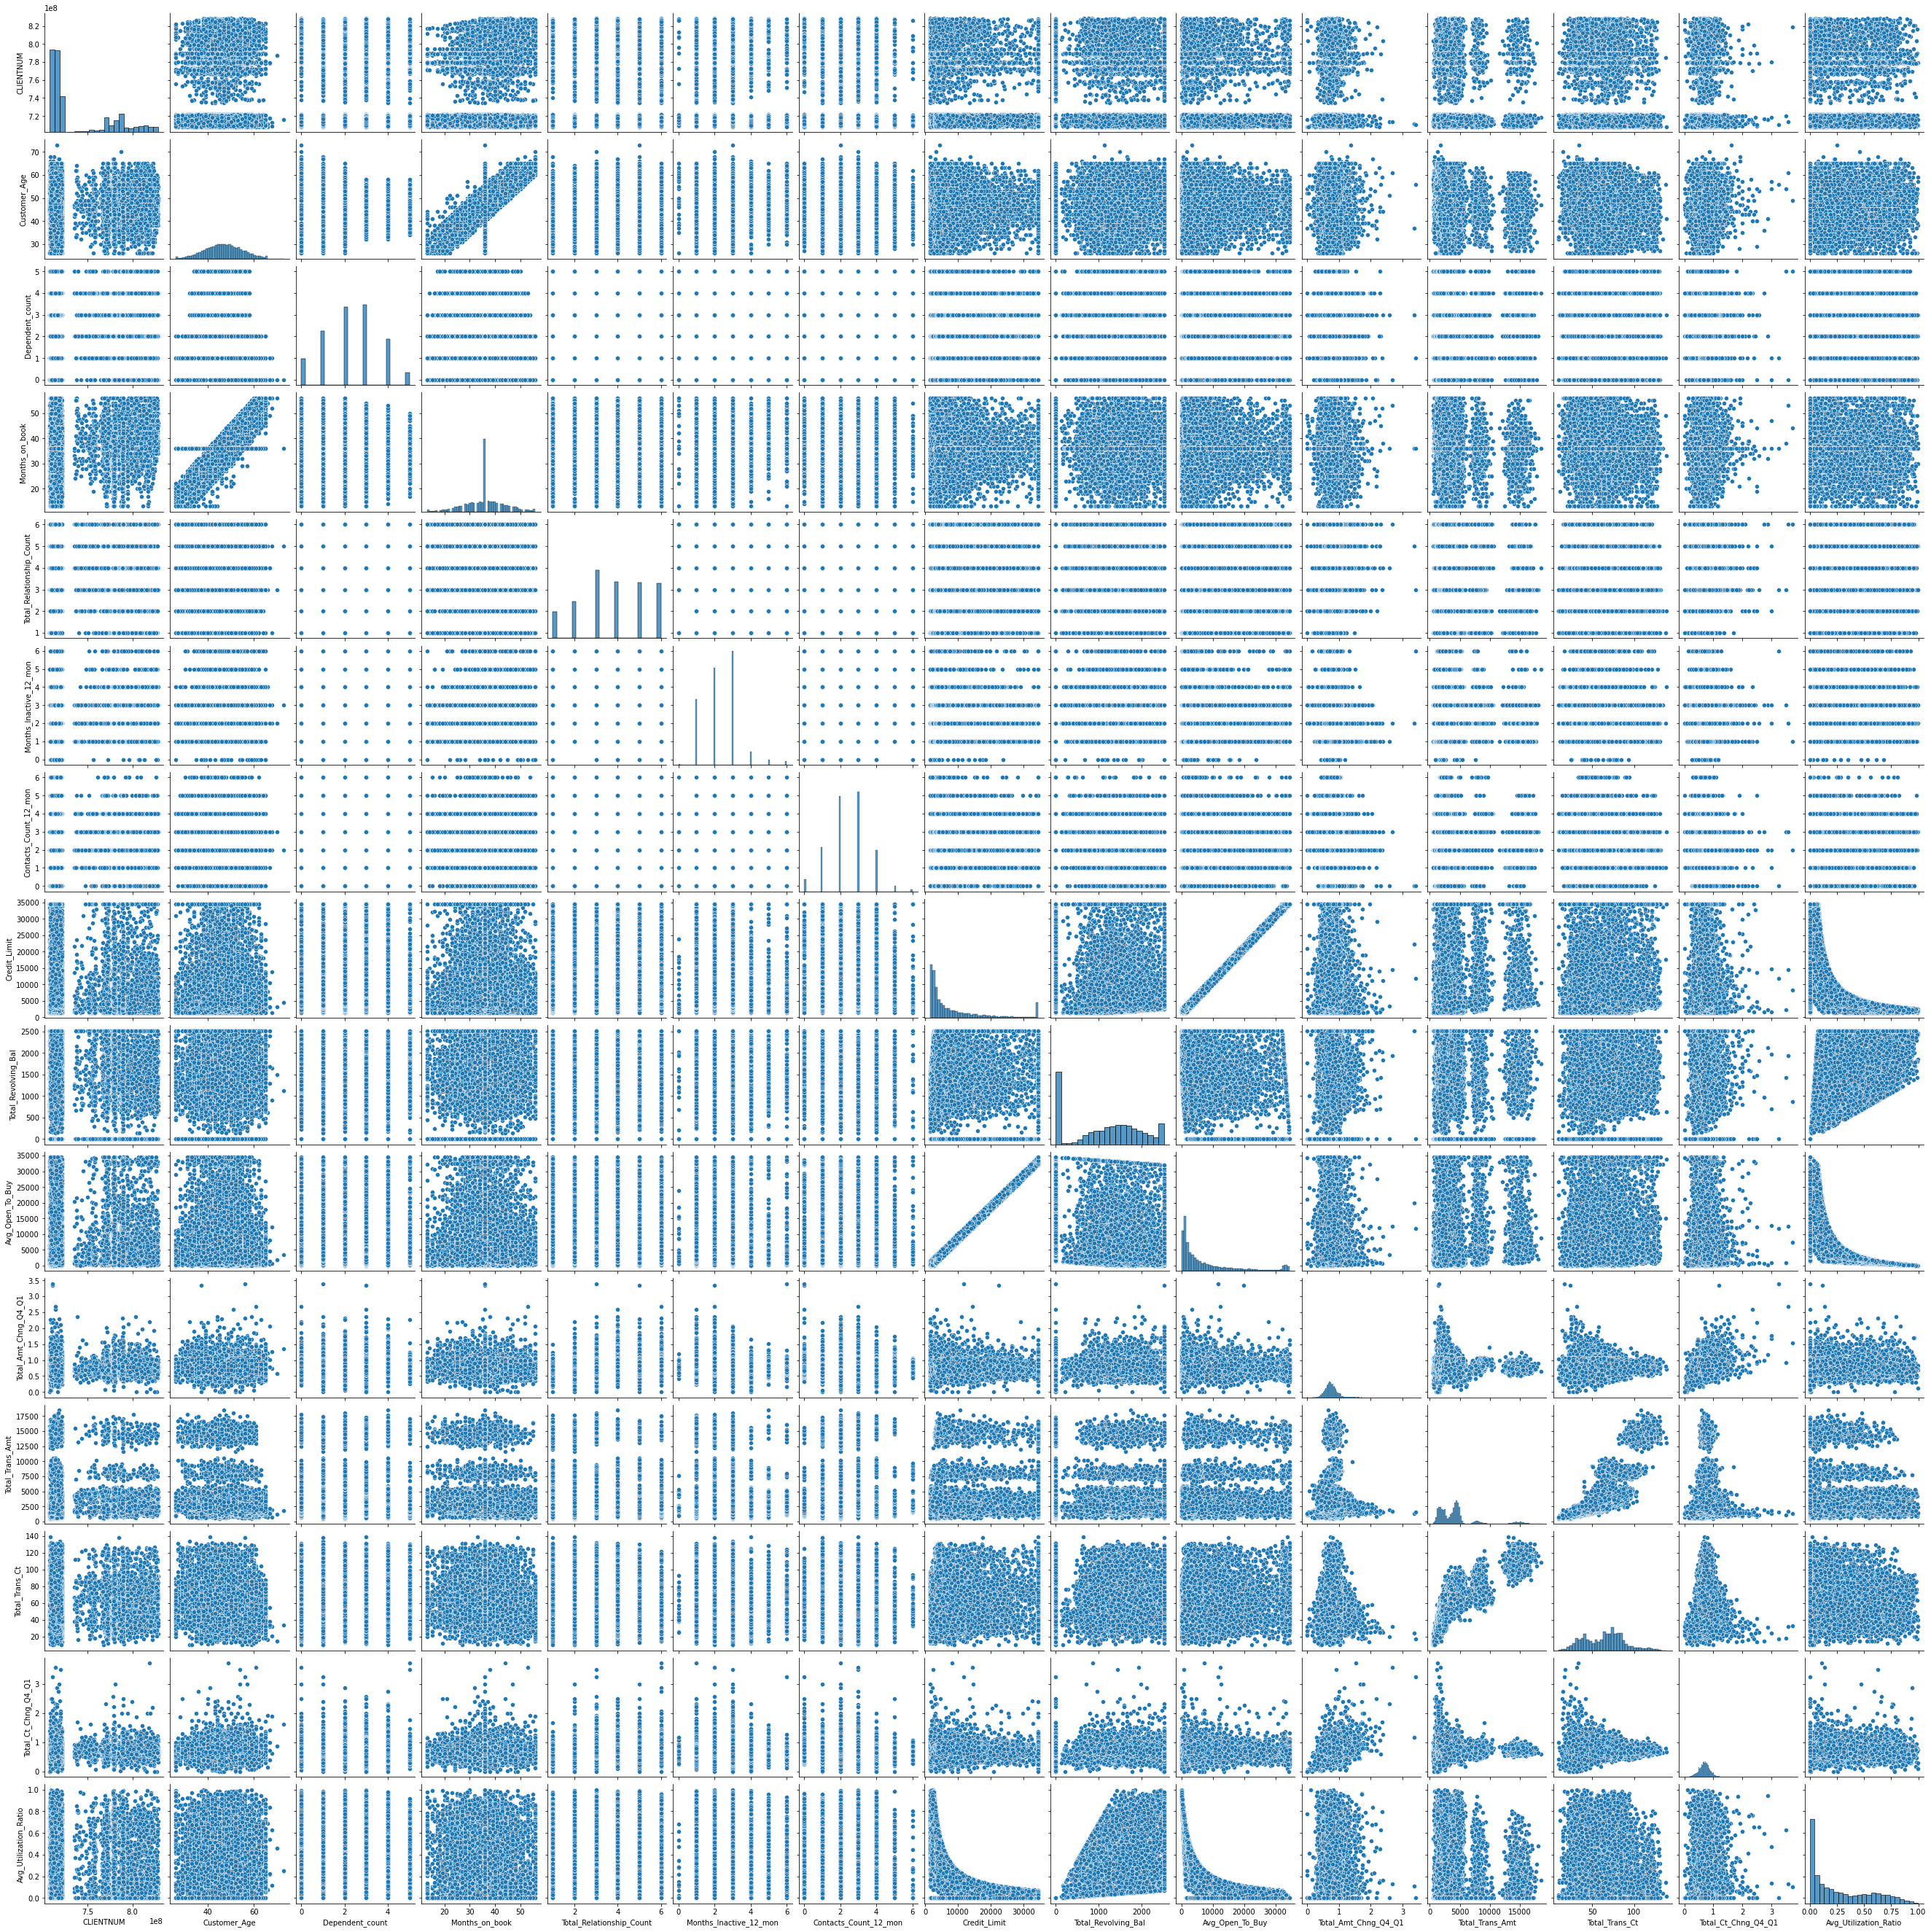

In [44]:
sns.pairplot(df)

**결측치 확인**

In [45]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**결측치는 없다는 것을 확인할 수 있다.**

## 타겟 데이터 확인하기

**두번째 칼럼인 "Attriiton_Flag"는 타깃변수이고, "Existing Cumstomer"(카드 유지 고객)과 "Attrited Customer"(탈퇴고객)이 있다. 여기서 관찰대상은 탈퇴고객이므로 탈퇴고객을 1로하고 유지고객은 0으로 바꿔준다.** 

In [46]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [47]:
df["Attrition_Flag"].replace({"Existing Customer":0,
                            "Attrited Customer":1,
                            },inplace=True)

**여기서 주의 깊게 살펴 보아야 할 것이 "탈퇴"여부이기 때문에 탈퇴를 1, 잔존을 0으로 하여 인코딩을 해준다.**

In [48]:
df["Attrition_Flag"].value_counts() # 전처리 확인

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

**Existing Cumstomer(잔존)과 Attrited Customer(이탈)의 비율**

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Count'>

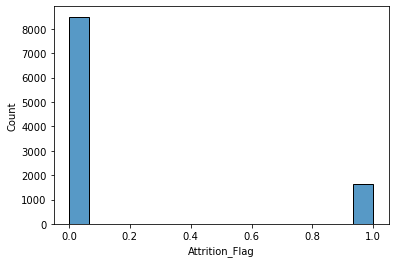

In [49]:
sns.histplot(df["Attrition_Flag"])

**Existing Cumstomer(잔존)과 Attrited Customer(이탈)의 비율에 차이가 있다. 수치를 비교해보도록 한다.**

In [50]:
Existing = df[df["Attrition_Flag"]==0]
Attrited = df[df["Attrition_Flag"]==1]

Existing_ratio = len(Existing)/len(Existing+Attrited)
Attrited_ratio = len(Attrited)/len(Existing+Attrited)

print("카드를 유지한 고객은 {:.2f} 이고, 탈퇴 고객은 {:.2f}이므로, 카드를 유지한 고객이 {:.0f}배 많다".format(Existing_ratio,Attrited_ratio,Existing_ratio/Attrited_ratio))

카드를 유지한 고객은 0.84 이고, 탈퇴 고객은 0.16이므로, 카드를 유지한 고객이 5배 많다


**업샘플링(오버샘플링)이나 다운샘플링(언더샘플링)이 필요한지 확인해 보아야한다.**

**분류 분석에서의 피처(독립)변수들은 피처들간의 상관성이 높지 않은 이상은 웬만하면 버리지 않고(삭제하지 않고) 쓰는 방향으로 작업을 진행한다**

## 피처 데이터 확인 하기

**나이 칼럼 확인 하기**

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

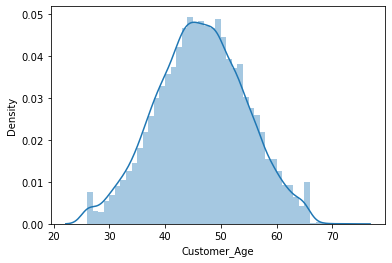

In [51]:
sns.distplot(df["Customer_Age"])

**Customer_Age (나이) 칼럼은 거의 완벽한 정규분포를 따른다는 것을 알 수 있다.**

**이상치 확인(시각화)**

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Age'>

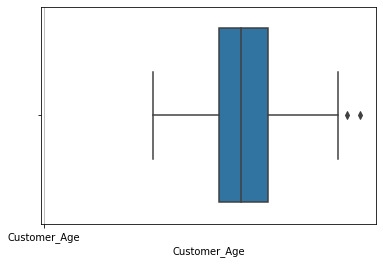

In [52]:
df[["Customer_Age"]].boxplot()
sns.boxplot(df["Customer_Age"])

**이상치 확인 (수치 확인)**
    여기서 박스플롯에서 범위 밖으로 넘어가는 2개의 plot이 보이는데, 이 값이 이 범위를 벗어난다고 하더라도, 이 수치가 데이터 분석에 큰 영향을 끼치지 않으면 ( 말이 안되는 값이거나 범위에서 너무 벗어난 값 -예를 들면 우리나라 연봉을 조사하는데 이재용 삼성 부회장의 연봉은 제외를 해야 한다. ) 그 값은 이상치로 취급하지 않는다.

In [53]:
df["Customer_Age"].max()

73

**나이 칼럼에서 가장 큰 수치는 73인데 이 수치는 충분히 가능한 값이다.만약 이 값이 200이다 라고 한다면 이 이상치는 삭제나 대체가 필요하지만, 73세는 나이로서 충분히 가능한 수치이므로 전처리 하지않는다.(이상치 취급하지 않음)**

In [54]:
# 이상치 확인 (참고 사항)
q1 = np.quantile(df["Customer_Age"],0.25)  
q3 = np.quantile(df["Customer_Age"],0.75) 
iqr = q3-q1
q3+iqr*1.5
q1-iqr*1.5

cond1 = q3+iqr*1.5<df["Customer_Age"]
cond2 = df["Customer_Age"]<q1-iqr*1.5

outlier_index = df[cond1 | cond2].index

**Gender(성별)**

In [55]:
df["Gender"].value_counts()
# Female 아니면 Male로 이진분류가 잘 되어있다.
# Label Encoding을 해주면 되겠다.

F    5358
M    4769
Name: Gender, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["Gender"])
df["Gender"] = le.transform(df["Gender"])

In [57]:
df["Gender"] # 라벨인코딩 된 것을 확인 할 수 있다.

0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Gender, Length: 10127, dtype: int64

<AxesSubplot:title={'center':'Dependent_count'}, xlabel='Dependent_count', ylabel='Count'>

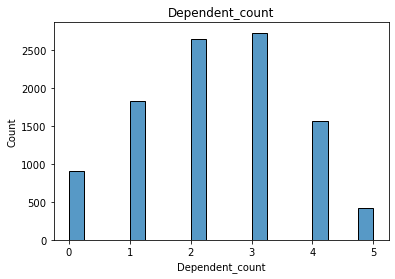

In [58]:
# 부양 가족 수 ( 특별한 전처리가 필요할 것 같진 않다.)
df["Dependent_count"].value_counts()
plt.title('Dependent_count')
sns.histplot(df['Dependent_count'],bins=20)

In [59]:
df.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

**피처변수들은 Labels(명목척도) , Orders(서열척도), Numerics(수치형) 변수로 나누었다.**

**범주형 변수들은 Unknown이라는 결측치를 가지고 있기 때문에 범주형 변수들만으로 결측치를 채우기에는 역부족이라고 생각한다. 그래서 범주형 변수들과 (결측치가 없는)수치형 변수들의 상관관계를 조사하여 결측치를 채워보도록하겠다** 

In [60]:
Labels = ['Gender','Marital_Status'] # 명목 척도
Orders = ['Education_Level','Income_Category','Card_Category'] # 서열 척도 (등간 척도)
Numerics = ['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] # 수치형 변수

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

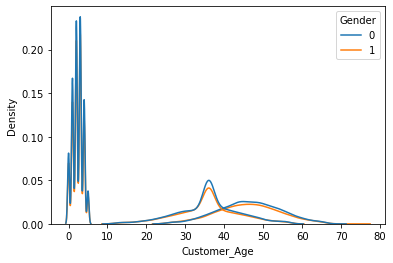

In [80]:
sns.kdeplot(data=df, x="Customer_Age", hue="Gender")
sns.kdeplot(data=df, x='Dependent_count', hue="Gender")
sns.kdeplot(data=df, x='Months_on_book', hue="Gender")

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

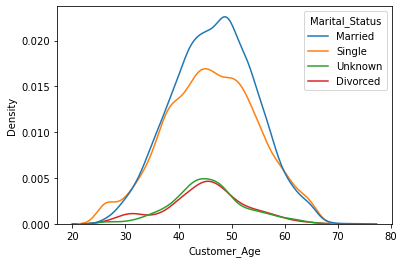

In [62]:
sns.kdeplot(data=df, x='Dependent_count', hue="Gender")

**먼저 성별(Gender)에 따라 수치형 변수들에 차이가 있는지 (상관관계)가 있는지 조사해 보도록한다.**

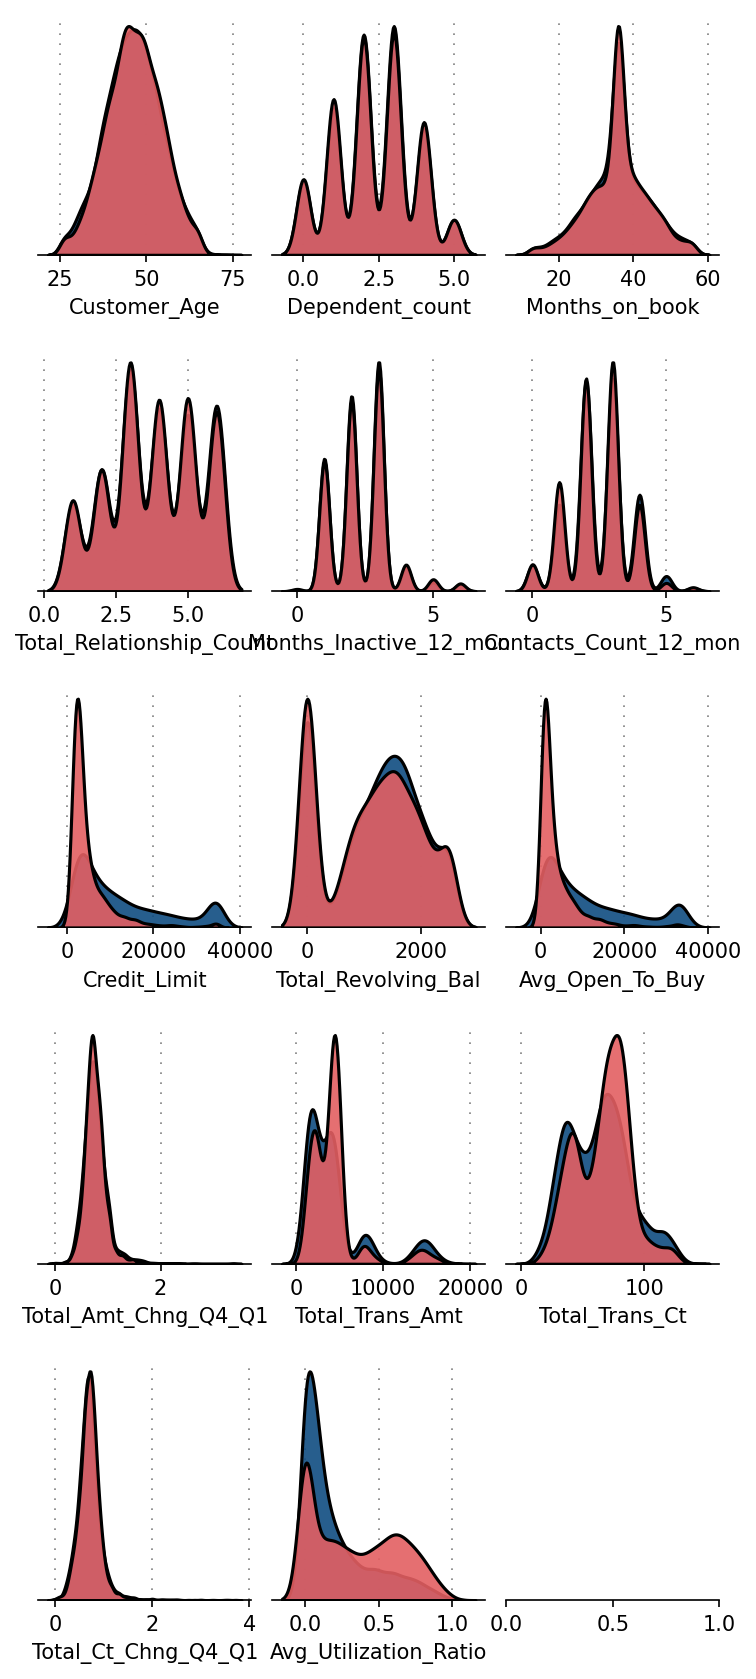

In [63]:
fig = plt.figure(figsize=(28, 14), dpi=150)
gs = fig.add_gridspec(5, 14)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 5):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['Gender'] == 1]
ns = df[df['Gender'] == 0]

for feature in Numerics:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=10, legend=True)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#e35f62', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=10, legend=True)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1


for i in range(0,14):
    globals()['ax'+str(i)].set_xlabel( Numerics[i])

**Gender에 따라 분포 차이가 많이 나는 것은 "Credit_Limit",'Avg_Open_To_Buy','Total_Trans_Amt','Total_Trans_Ct', 'Avg_Utilization_Ratio'이 보인다.**

In [64]:
**Gender(범주형 변수-명목척도)와 수치형 변수간의 상관관계를 보기 위해 상관관계를 구해보도록하겠다. 수치형 변수와 범주형 변수의 상관관계를 볼때에는

SyntaxError: invalid syntax (4139664114.py, line 1)

**혼인 여부(Marital_Status)에 따른 수치형 변수들의 변화**

In [65]:
df["Marital_Status"].replace({"Unknown":0,
                             "Married":1,
                             "Single":2,
                             "Divorced":3},
                            inplace=True) 

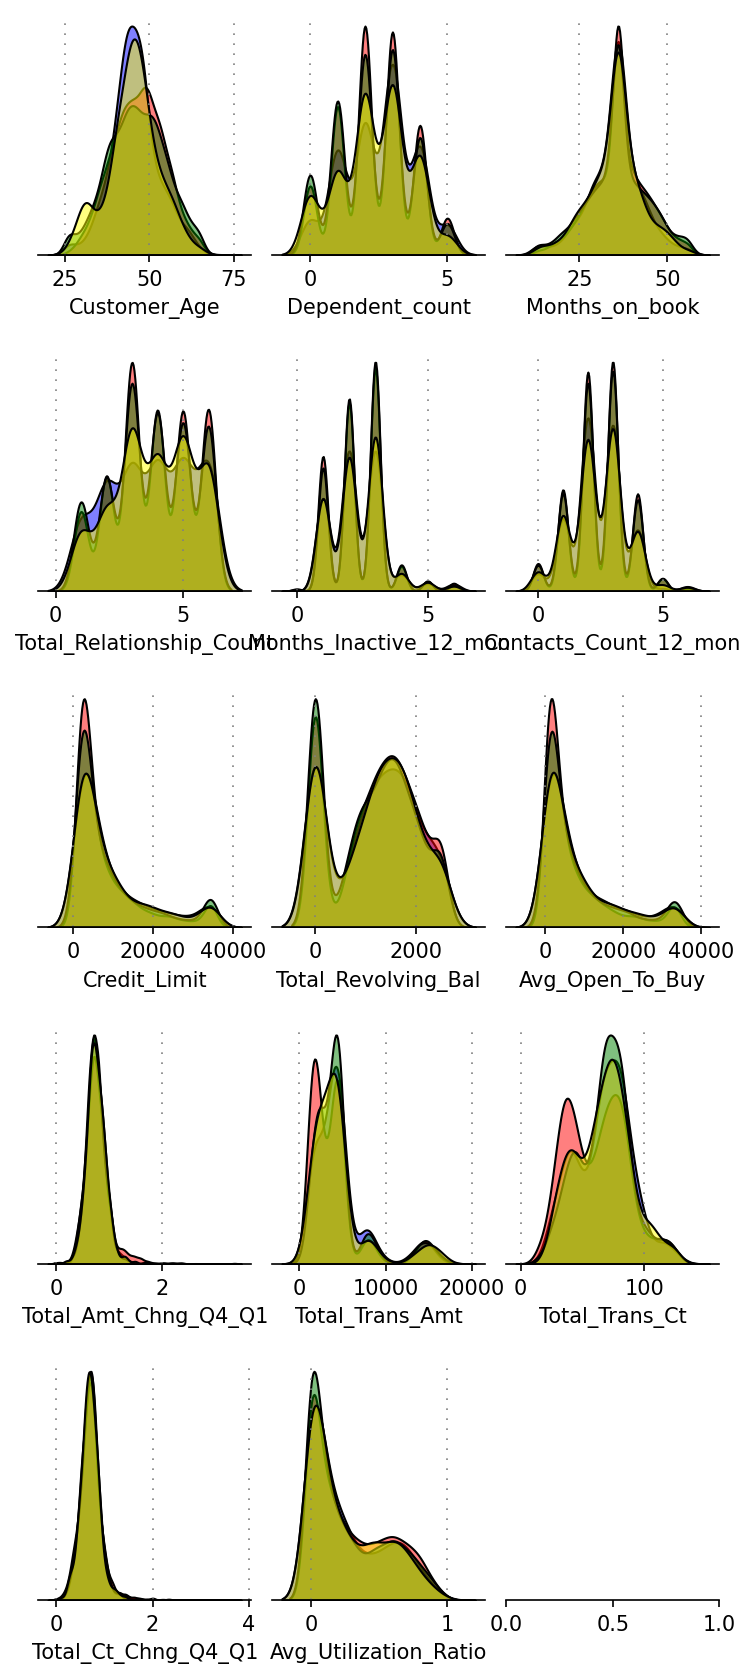

In [66]:
fig = plt.figure(figsize=(28, 14), dpi=150)
gs = fig.add_gridspec(5, 14)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 5):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s1 = df[df['Marital_Status'] == 0]
s2 = df[df['Marital_Status'] == 1]
s3 = df[df['Marital_Status'] == 2]
s4 = df[df['Marital_Status'] == 3]

for feature in Numerics:
        sns.kdeplot(s1[feature], ax=locals()["ax"+str(plot)], color='Blue', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s2[feature],ax=locals()["ax"+str(plot)], color='Red', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s3[feature],ax=locals()["ax"+str(plot)], color='Green', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s4[feature],ax=locals()["ax"+str(plot)], color='Yellow', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1


for i in range(0,14):
    globals()['ax'+str(i)].set_xlabel( Numerics[i])

**혼인 여부에 따라서는 분포가 크게 변하지는 않지만, 'Total_Trans_Amt','Total_Trans_Ct' 두 가지가 가장 큰 영향을 미친다**

In [67]:
## 상관관계 수치 확인하기

In [68]:
df["Income_Category"].replace({"$60K - $80K":2,
                                 "$40K - $60K":1,
                                 "Unknown":5,
                                 "Less than $40K":0,
                                 "$80K - $120K":3,
                                 "$120K +":4,
                                 },inplace=True)

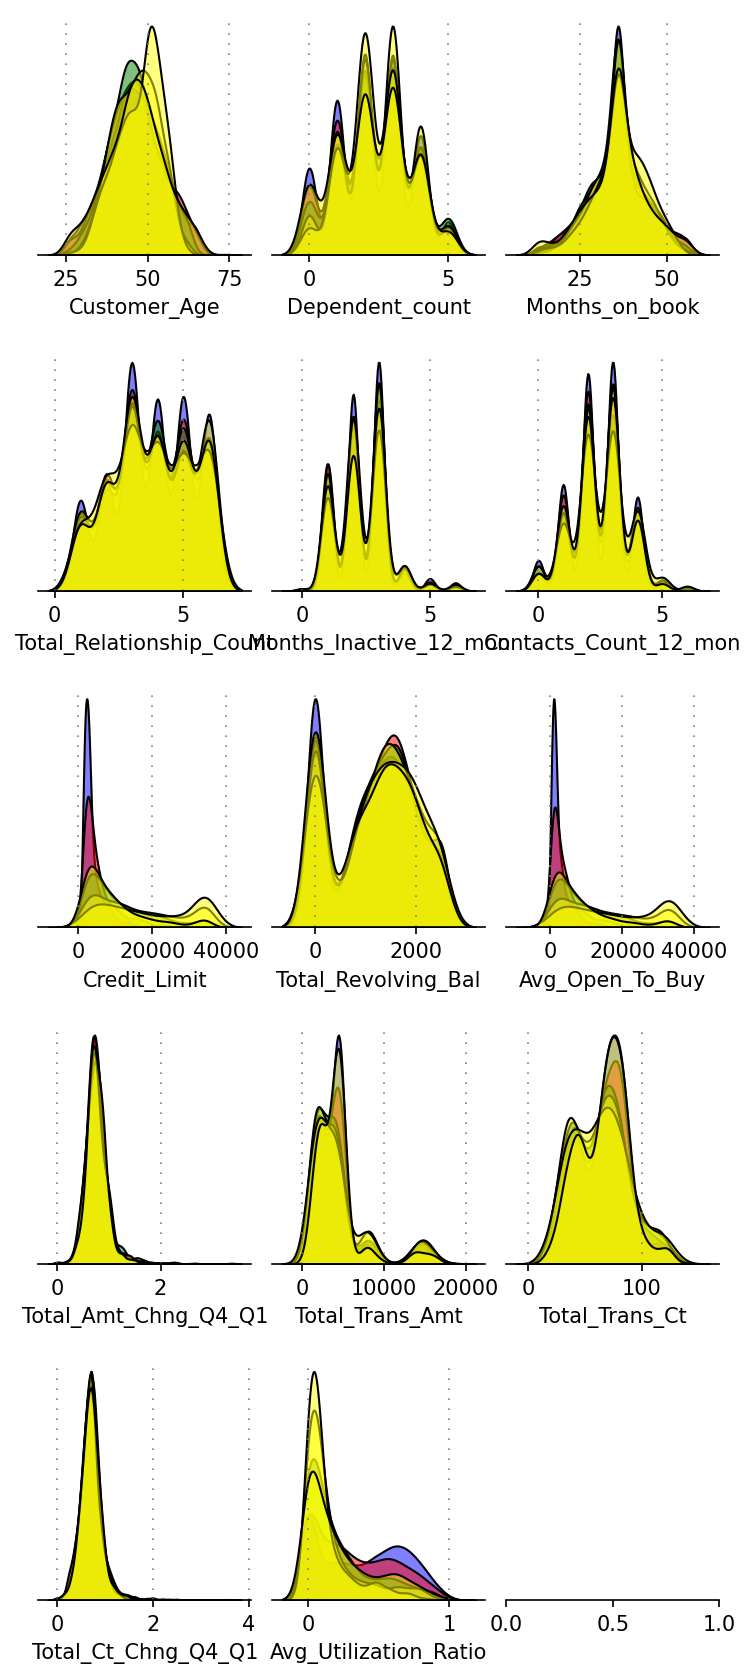

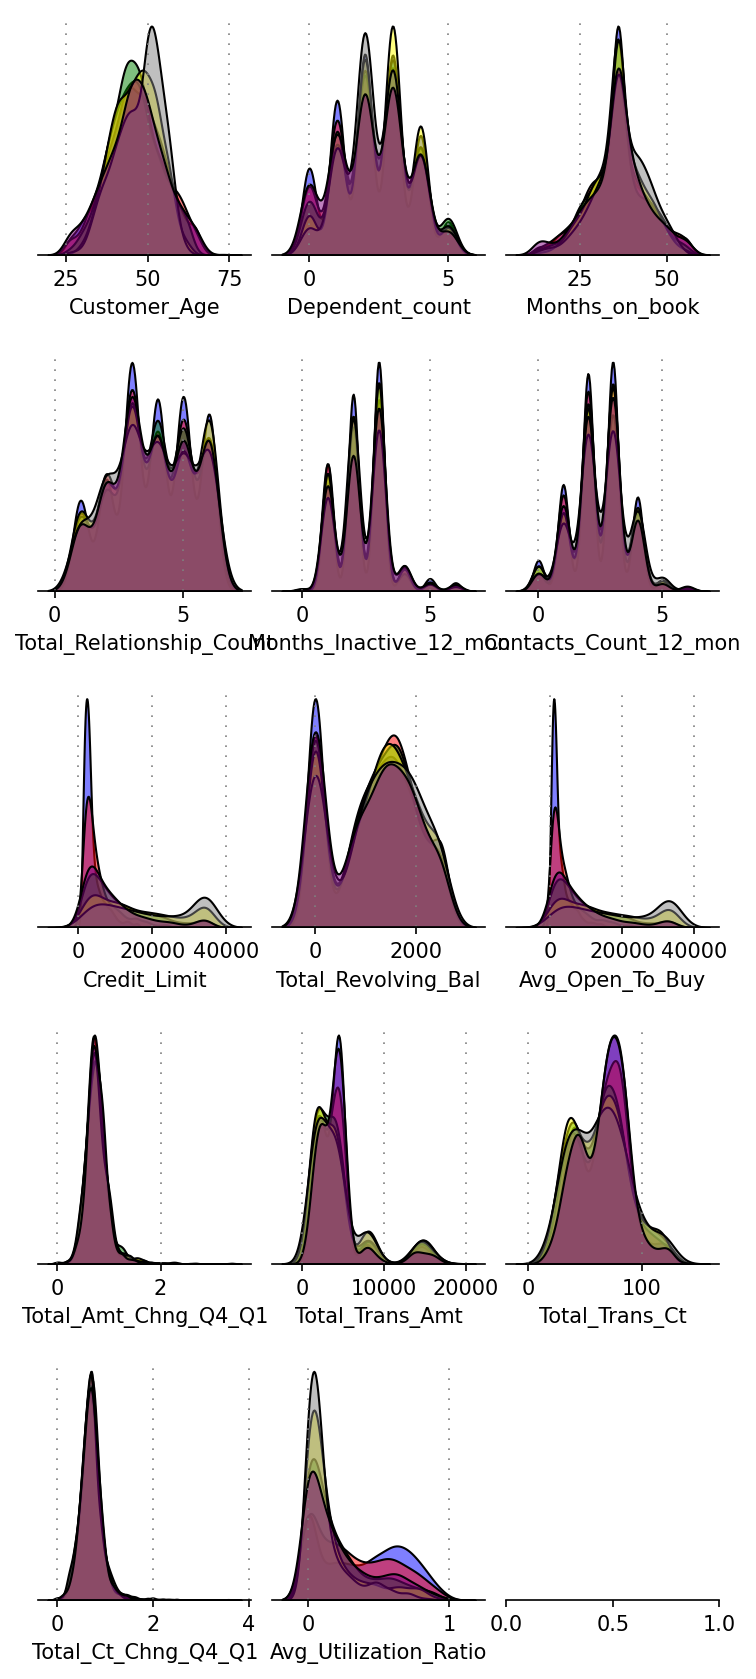

In [77]:
fig = plt.figure(figsize=(28, 14), dpi=150)
gs = fig.add_gridspec(5, 14)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 5):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s1 = df[df['Income_Category'] == 0]
s2 = df[df['Income_Category'] == 1]
s3 = df[df['Income_Category'] == 2]
s4 = df[df['Income_Category'] == 3]
s5 = df[df['Income_Category'] == 4]
s6 = df[df['Income_Category'] == 5]

for feature in Numerics:
        sns.kdeplot(s1[feature], ax=locals()["ax"+str(plot)], color='Blue', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s2[feature],ax=locals()["ax"+str(plot)], color='Red', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s3[feature],ax=locals()["ax"+str(plot)], color='Green', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s4[feature],ax=locals()["ax"+str(plot)], color='Yellow', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s5[feature],ax=locals()["ax"+str(plot)], color='Yellow', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s6[feature],ax=locals()["ax"+str(plot)], color='Yellow', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1


for i in range(0,14):
    globals()['ax'+str(i)].set_xlabel( Numerics[i])
    
fig = plt.figure(figsize=(28, 14), dpi=150)
gs = fig.add_gridspec(5, 14)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 5):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s1 = df[df['Income_Category'] == 0]
s2 = df[df['Income_Category'] == 1]
s3 = df[df['Income_Category'] == 2]
s4 = df[df['Income_Category'] == 3]
s5 = df[df['Income_Category'] == 4]
s6 = df[df['Income_Category'] == 5]

for feature in Numerics:
        sns.kdeplot(s1[feature], ax=locals()["ax"+str(plot)], color='Blue', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s2[feature],ax=locals()["ax"+str(plot)], color='Red', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s3[feature],ax=locals()["ax"+str(plot)], color='Green', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s4[feature],ax=locals()["ax"+str(plot)], color='Yellow', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s5[feature],ax=locals()["ax"+str(plot)], color='Grey', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s6[feature],ax=locals()["ax"+str(plot)], color='Purple', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1


for i in range(0,14):
    globals()['ax'+str(i)].set_xlabel( Numerics[i])

In [70]:
df["Card_Category"].replace({"Blue":0,
                                 "Silver":1,
                                 "gold":2,
                                 "Platinum":3,
                                 },inplace=True)

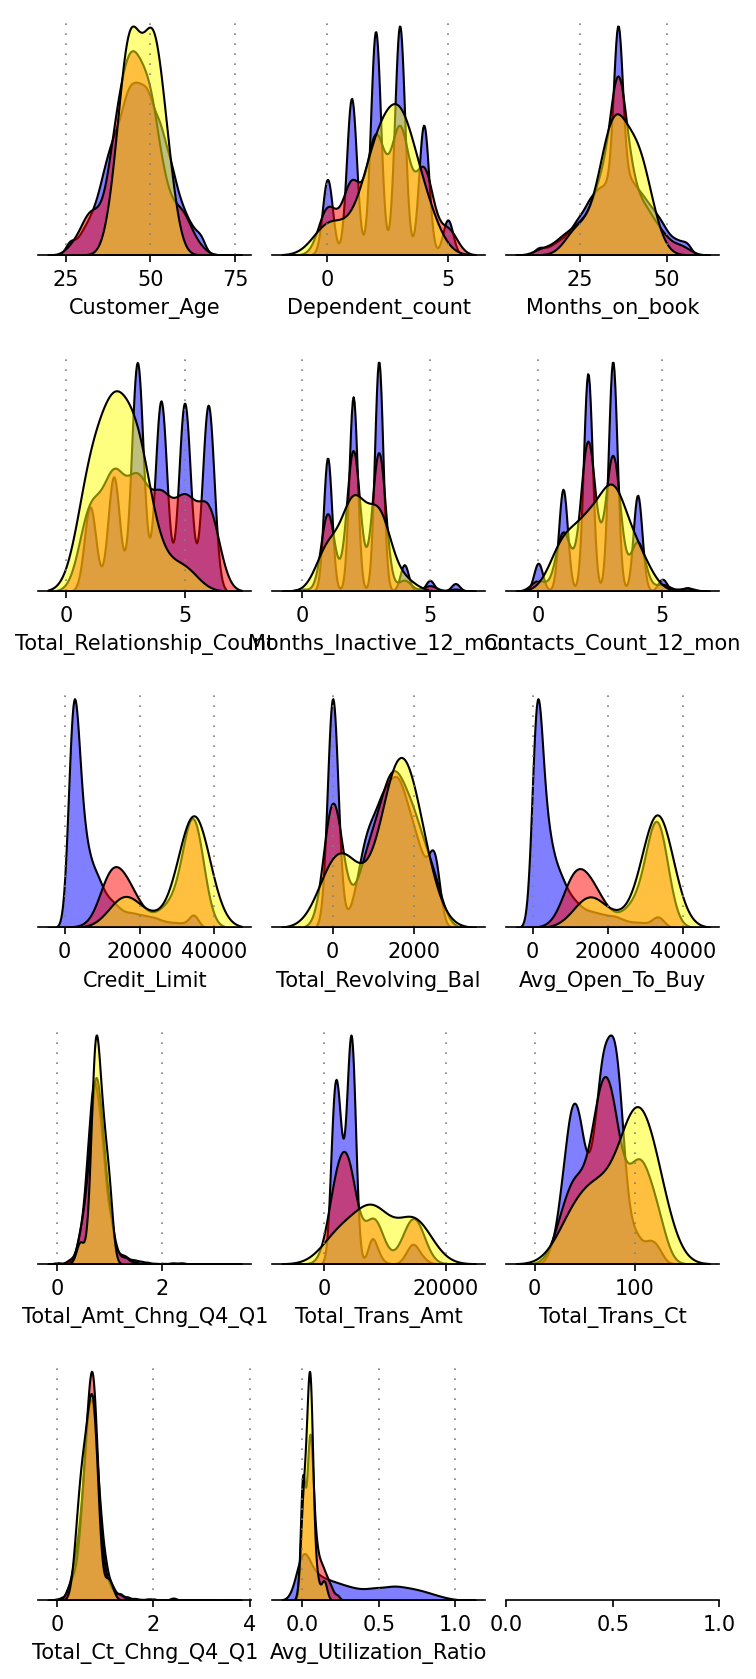

In [71]:
fig = plt.figure(figsize=(28, 14), dpi=150)
gs = fig.add_gridspec(5, 14)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 5):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s1 = df[df["Card_Category"] == 0]
s2 = df[df["Card_Category"] == 1]
s3 = df[df["Card_Category"] == 2]
s4 = df[df["Card_Category"] == 3]

for feature in Numerics:
        sns.kdeplot(s1[feature], ax=locals()["ax"+str(plot)], color='Blue', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s2[feature],ax=locals()["ax"+str(plot)], color='Red', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s3[feature],ax=locals()["ax"+str(plot)], color='Green', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        sns.kdeplot(s4[feature],ax=locals()["ax"+str(plot)], color='Yellow', shade=True, linewidth=1, ec='black',alpha=0.5, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1


for i in range(0,14):
    globals()['ax'+str(i)].set_xlabel( Numerics[i])

In [72]:
# 비활성 기간 ( 12개월 내 )
df["Months_Inactive_12_mon"].isnull().sum()

0

In [73]:
df["Months_Inactive_12_mon"].value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

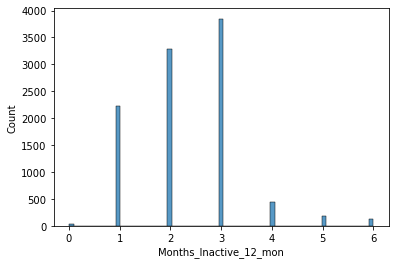

In [74]:
sns.histplot(df["Months_Inactive_12_mon"])

In [75]:
df["Contacts_Count_12_mon"].isnull().sum()

0

**이 값은 연속적인 값이 아니라, 범주형에 가까운 변수이기 때문에 사실 이상치를 확인 하는 것이 그렇게 중요한 일은 아니었다. 그보다는 비활성 기간을 개월로 보았을 때 12개월내의 비활성화된 기간이 6개월까지 밖에 안된다는 점이 의문인 상황인데, 왜 더 긴 기간동안 비활성화 된 고객은 없는지에 대해서 조사가 필요하다**

In [76]:
df["Contacts_Count_12_mon"].value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

In [ ]:
sns.boxplot(df["Contacts_Count_12_mon"])

In [ ]:
sns.histplot(df["Contacts_Count_12_mon"])

In [ ]:
df["Credit_Limit"].isnull().sum()

In [ ]:
df["Credit_Limit"].isnull().value_counts()

In [ ]:
sns.boxplot(df["Credit_Limit"])

In [ ]:
sns.histplot(df["Credit_Limit"])

In [ ]:
df["Credit_Limit"].max()

**신용한도가 일정 이상인 경우는 하나의 카테고리로 잡은 것 같다.**

In [ ]:
df["Total_Trans_Amt"].mean()

In [ ]:
df["Total_Trans_Ct"]

In [ ]:
df["Total_Trans_Amt"]

In [ ]:
df["Avg_Open_To_Buy"]

**가장 문제가 되는 피처는 Unknown이 많은 "Education_Level"(교육 수준)과 "Income_Category"(소득 수준)이다.**

### Unknown에 대한 처리 방법은
    1. Unknown도 하나의 category로 해석
    2. Unknown값이 있는 행을 삭제하거나, 칼럼 자체(피처)를 삭제
    3. 모델링을 활용하여 대체를 하는 방법이 있다.
    4. 최빈값으로 대체
### 일단 모델링에서 답은 없고 여러가지로 시도해보는것이 가장 중요한것 같다.

In [ ]:
import scipy.stats as stats 
stats.spearmanr(df3["Income_Category_1"], df3["Education_Level_1"])

In [ ]:
import pandas as pd
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    phi2 = stat / obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(obs - 1)))
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



In [ ]:
cramers_V(df["Income_Category_1"],df["Attrition_Flag"])

In [ ]:
cramers_V(df3["Income_Category_1"],df3["Card_Category"])

In [ ]:

df["Card_Category"].value_counts()
df["Card_Category"].replace({"Gold":2,
                            "Silver":1,
                            "Blue":0,
                            "Platinum":3
                            },inplace=True)


In [ ]:
cramers_V(df["Gender"],df["Attrition_Flag"])

In [ ]:
df["Income_Category_1"]

**첫번째 칼럼인 "CLIENTNUM"는 식별자로 사용됨으로 삭제해주도록 한다.**